# DIAS Homework 4
Hermitian Matrices and HMC

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import linalg as LA
from tqdm.notebook import tqdm

## Hermitian matrix generator

In [62]:
#Function to generate random Hermitian Matrix
def hermitian_matrix(N, sigma):
    matrix=np.zeros((N,N), dtype=complex)
    for ii in range(N):
        matrix[ii,ii]=np.random.normal(0,sigma)
    
    for ii in range(N):
        for jj in range(N):
            if ii!=jj:
                matrix[ii,jj]=complex(np.random.normal(0, sigma/np.sqrt(2)), np.random.normal(0, sigma/np.sqrt(2)))
    
    matrix=np.matrix(matrix)
    return 0.5*(matrix+matrix.getH())

In [63]:
mat=hermitian_matrix(4,10)
print(mat)
print(complex(2,3))

[[-13.89401649 +0.j          -3.58901099 -0.02397516j
   -2.08807034 +6.64812584j   1.63038931 -5.18565161j]
 [ -3.58901099 +0.02397516j   1.39448162 +0.j
   -7.75046965 +3.59869418j  -8.23487646 +7.88047358j]
 [ -2.08807034 -6.64812584j  -7.75046965 -3.59869418j
   -3.4730388  +0.j           0.31904893-10.88073695j]
 [  1.63038931 +5.18565161j  -8.23487646 -7.88047358j
    0.31904893+10.88073695j  10.34240524 +0.j        ]]
(2+3j)


## HMC For the system

In [15]:
#HMC Functions

#Action/potential of the system
def potential(phi):
    return (1/len(phi))*np.trace(phi**2)

#Function to return the derivative of the potential 
def d_potential(phi): 
    return 2*(1/len(phi))*phi

#Hamiltonian function
def hamiltonian(potential, momentum):
    return potential + (1/(2*len(momentum)))*np.trace(momentum**2)

In [89]:
#Perform the HMC
#Dimension of matrices
N=50
sigma=0.02

#Start with a random phi
phi0=hermitian_matrix(N, sigma)

#Sensitivity of the new guess
E=(N**1.5)*sigma

#Number of terms wanted 
terms_wanted=1e3

#Time range allowed 
times=np.linspace(1,100,250)
dt=times[1]-times[0]

#Start loop to generate the eigenvalue distribution
phi2_traces=np.zeros(int(terms_wanted))
phi4_traces=np.zeros(int(terms_wanted))
eigen_vals=np.zeros((int(terms_wanted/10),N))

#Tracking
iterations=0
successes=0 

for ii in tqdm(range(int(terms_wanted))):
    #Give random impulse 
    while phi2_traces[ii]==0:
        iterations+=1
        p0=hermitian_matrix(N,sigma)
        #Generate a new phi
        phi1=phi0 + E*hermitian_matrix(N,sigma)
        p1=p0
        #Allow the new phi to evolve using leapfrog 
        for jj in range(len(times)):
            placeholder_potential=d_potential(phi1)
            phi1=phi1 + p1*dt - 0.5*placeholder_potential*(dt**2)
            new_potential=d_potential(phi1)
            p1 = p1 - 0.5*(placeholder_potential+new_potential)*dt
            
        #Now calculate the difference in hamiltonians
        ds=hamiltonian(potential(phi1), p1) - hamiltonian(potential(phi0), p0)
        if np.exp(-ds)>np.random.uniform(0,1):
            phi0=phi1
            phi2_traces[ii]=np.trace(phi1**2)
            phi4_traces[ii]=np.trace(phi1**4)
            successes+=1
            if ii%10==0:
                eigen_vals[int(ii/10)]=LA.eigvalsh(phi1)
                
#Flatten the eigenvalues 
eigen_vals=eigen_vals.flatten()
                
print('The ratio is', successes/iterations)

#First guess is huge but all other guesses are tiny in comparison. Majority of failures are
#coming from the first attempt

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part



The ratio is 0.9823182711198428


<IPython.core.display.Javascript object>


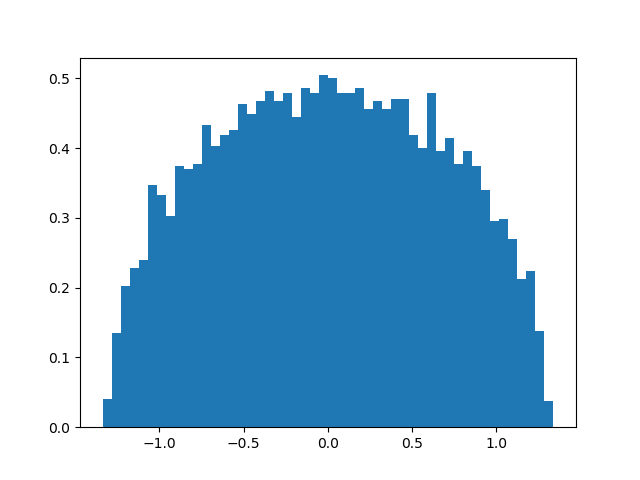

The mean of squared elements is 21.70942903096282
The mean of elements to the 4 is 18.853592041068175


In [90]:
%matplotlib notebook
plt.hist(eigen_vals, bins=50, density=1)
print('The mean of squared elements is', np.mean(phi2_traces))
print('The mean of elements to the 4 is', np.mean(phi4_traces))